<a href="https://colab.research.google.com/github/nijnuyh/AI-DATA/blob/main/Linear_Algebra%2C_Matrix_Calculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **왜 선형대수를 알아야 하는가?**

Deep learning을 이해하기 위해서 반드시 선형대수 + 행렬미분 + 확률의 탄탄한 기초가 필요하다.

예) Transfomer (모델)의 attention matrix:
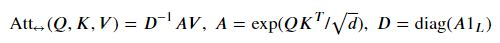

이렇게 핵심 아이디어가 행렬에 관한 식으로 표현되는 경우가 많다.

**목표: 선형대수가 행렬미분의 기초를 배우고 간단한 `머신러닝 알고리즘(PCA)`을 유도해보고자 한다.**

## **기본 표기법 (Basic Notation)**



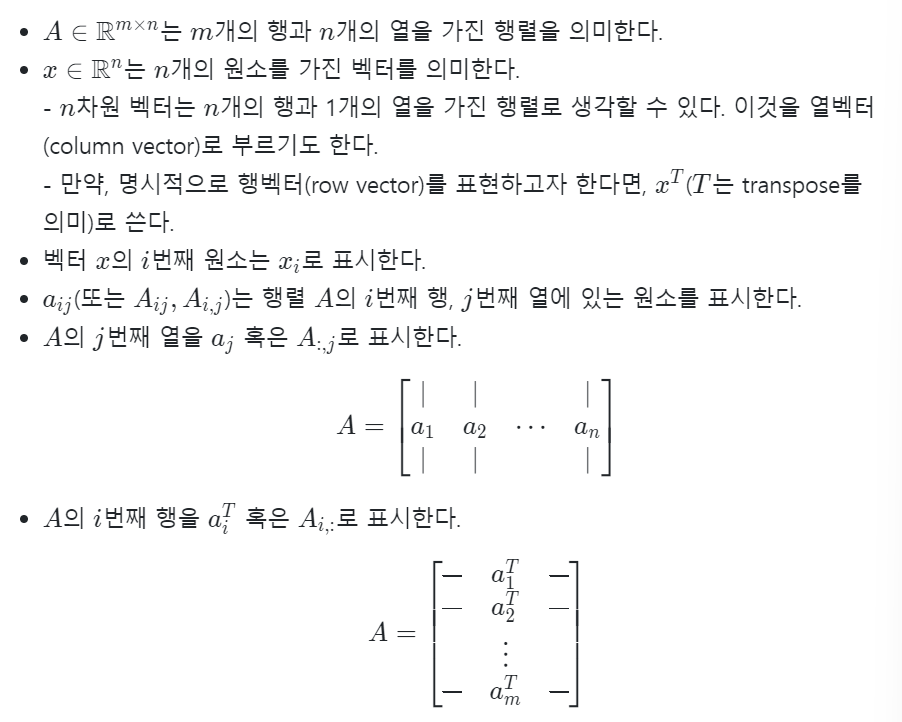

Python에서의 벡터, 행렬 표현방법

In [60]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

In [61]:
import numpy as np
x = np.array([10.5, 5.2, 3.25,7.0])

In [62]:
x.shape
# 1차원 벡터, (행 4,1)

(4,)

In [63]:
i = 1
x[i]

5.2

In [64]:
# 차원 추가
np.expand_dims(x, axis=1).shape

(4, 1)

In [65]:
# 차원 추가
np.expand_dims(x, axis=1)

array([[10.5 ],
       [ 5.2 ],
       [ 3.25],
       [ 7.  ]])

In [71]:
# 새로운 행렬 생성

A = np.array([
    [10,20,30],
    [40,50,60]
])

A

array([[10, 20, 30],
       [40, 50, 60]])

In [74]:
A.shape

(2, 3)

In [73]:
i = 0
j = 2
A[i, j]

30

In [72]:
# column vector
j = 1
A[:, j] 

array([20, 50])

In [75]:
# row vector
i = 1
A[i, :]

array([40, 50, 60])

## **행렬의 곱셈 (Matrix Multiplication)**

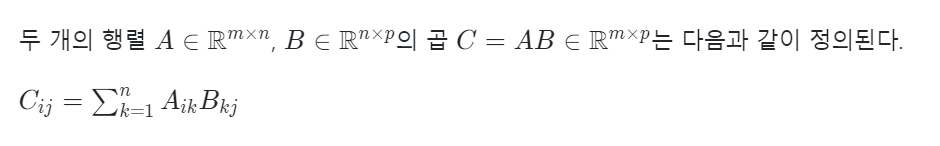

행렬의 곱셈을 이해하는 몇 가지 방식들


*   벡터 X 벡터 : 내적, 외적
*   행렬 X 벡터
*   행렬 X 행렬




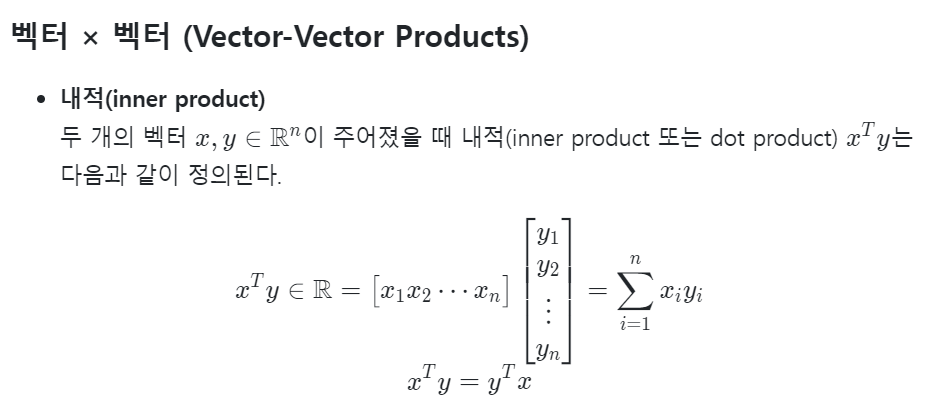

- scalar 값이 결과임


In [76]:
import numpy as np
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
x.dot(y)

32

In [77]:
y.dot(x)

32

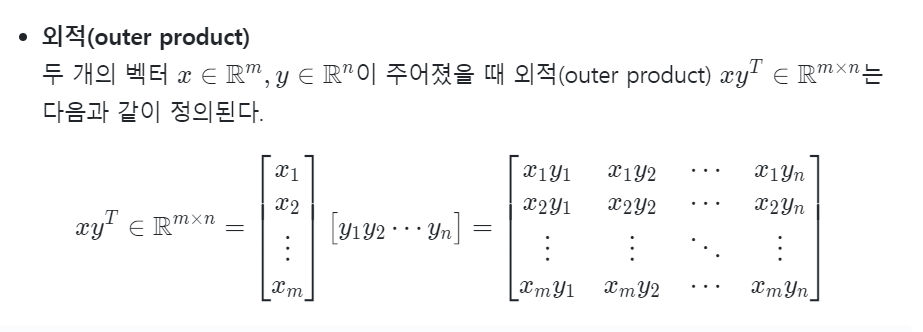

- 외적의 경우 두 벡터의 차원이 달라도 상관없음
- mxn 행렬로 결과가 나옴

In [16]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

In [79]:
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=0)
x, y

(array([[[1]],
 
        [[2]],
 
        [[3]]]),
 array([[[4, 5, 6]]]))

In [80]:
np.matmul(x,y)

array([[[ 4,  5,  6]],

       [[ 8, 10, 12]],

       [[12, 15, 18]]])

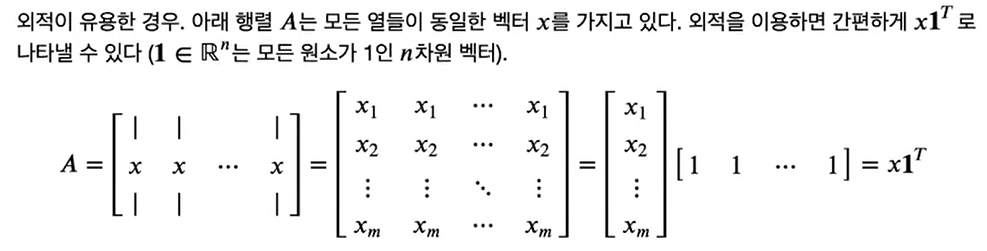

In [81]:
# column vector
x = np.expand_dims(np.array([1, 2, 3]), axis=1)
x

array([[1],
       [2],
       [3]])

In [82]:
ones = np.ones([1, 4])
ones

array([[1., 1., 1., 1.]])

In [83]:
A = np.matmul(x, ones)
A

array([[1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.]])

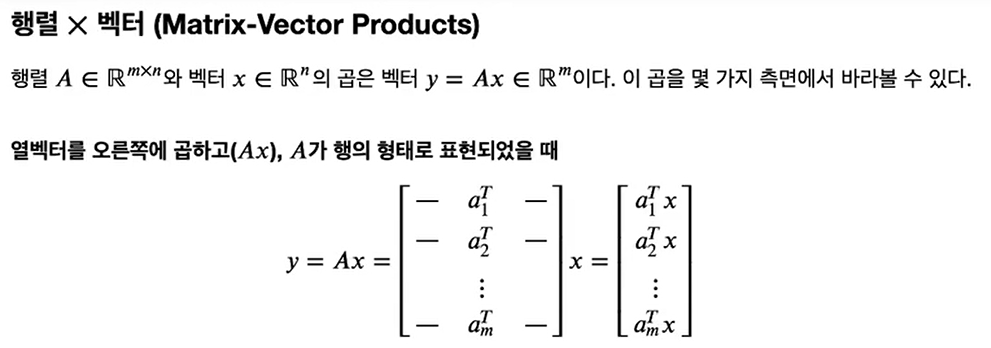

In [84]:
A = np.array([
    [1,2,3],
    [4,5,6]
])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
ones = np.ones([3,1])
ones

array([[1.],
       [1.],
       [1.]])

In [87]:
np.matmul(A, ones)

array([[ 6.],
       [15.]])

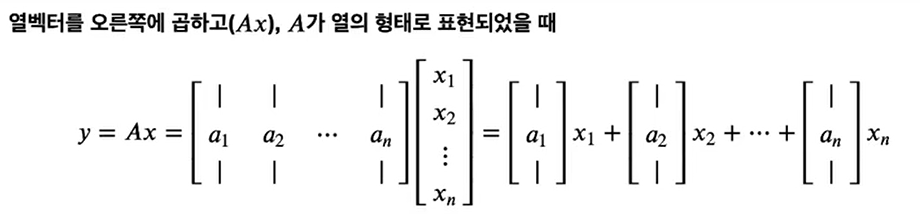

In [88]:
A = np.array([
    [1,0,1],
    [0,1,1]
])
x = np.array([
    [1],
    [2],
    [3]
])
np.matmul(A, x)

array([[4],
       [5]])

In [89]:
for i in range(A.shape[1]):
    print('a_'+str(i)+':', A[:,i], '\tx_'+str(i)+':', x[i], '\ta_'+str(i)+'*x_'+str(i)+':', A[:,i]*x[i])

a_0: [1 0] 	x_0: [1] 	a_0*x_0: [1 0]
a_1: [0 1] 	x_1: [2] 	a_1*x_1: [0 2]
a_2: [1 1] 	x_2: [3] 	a_2*x_2: [3 3]


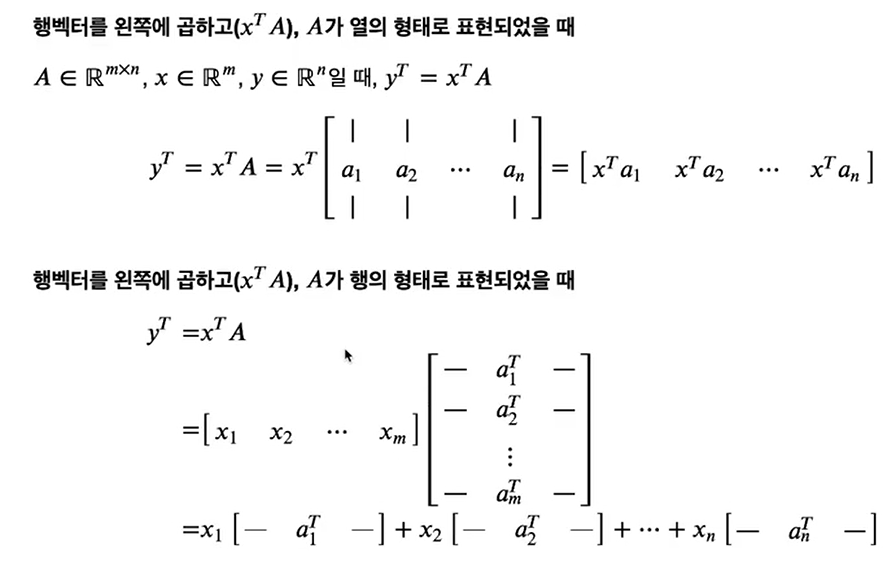

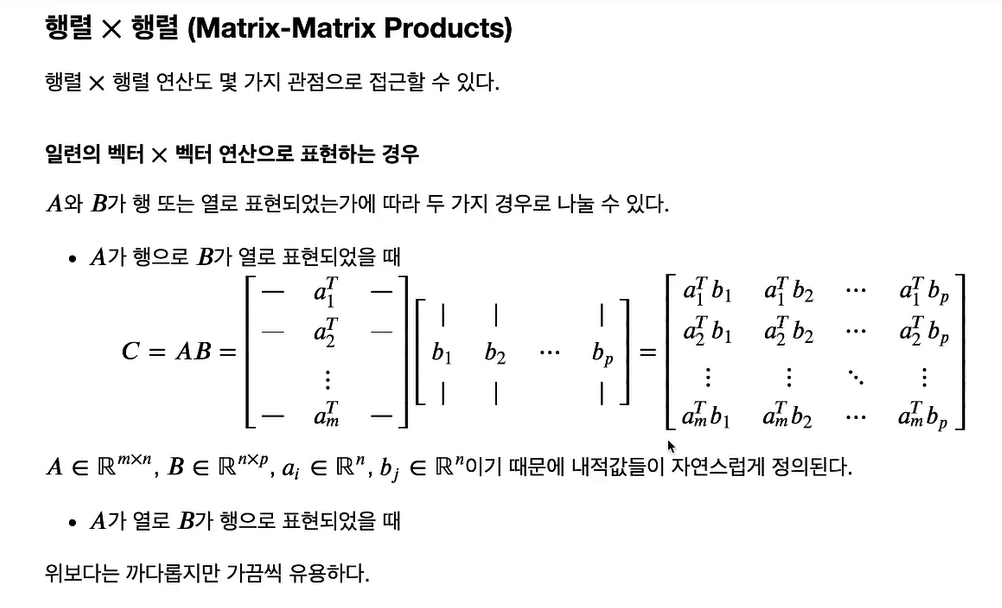

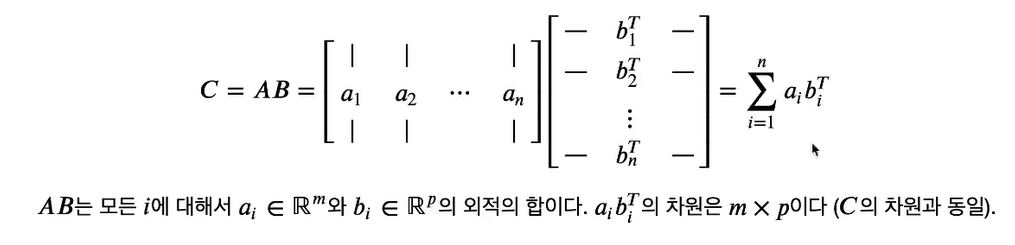

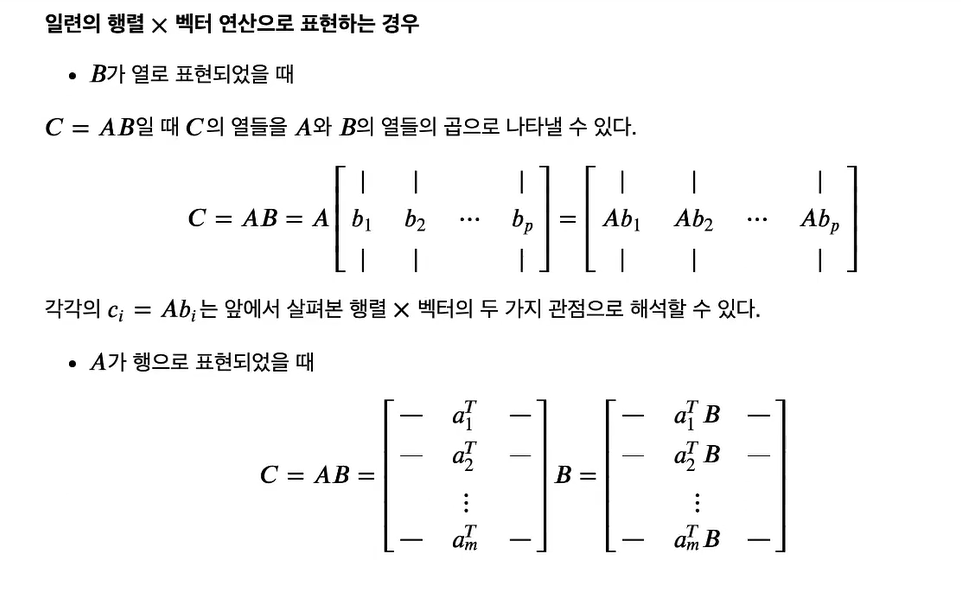

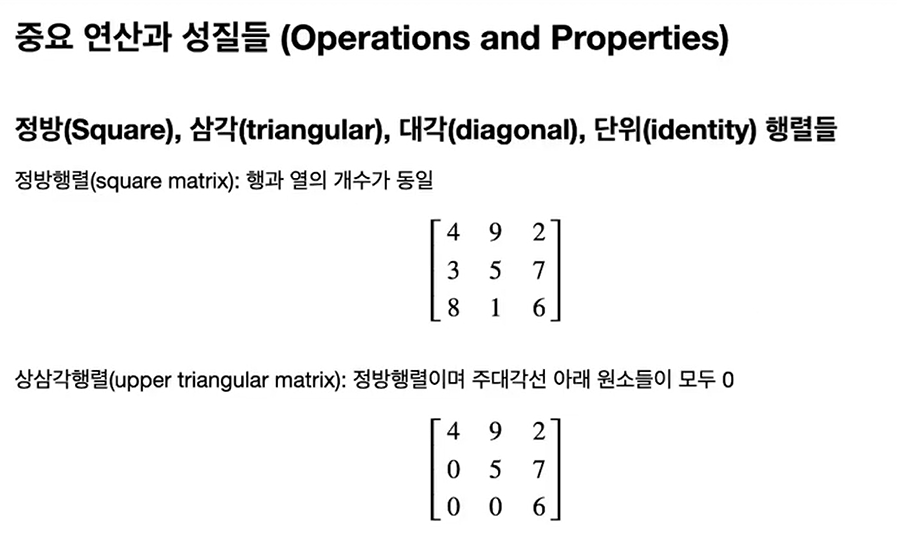

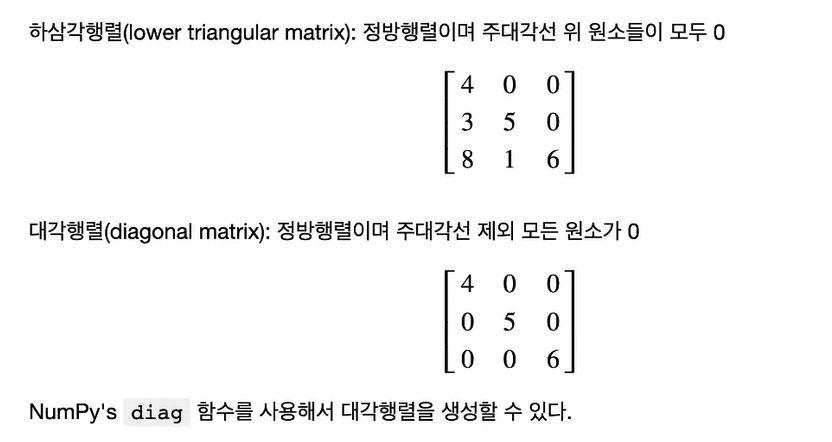

In [90]:
np.diag([4,5,6])

array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])

`diag` 함수에 행렬을 전달하면 주대각선 값들을 얻을 수 있다.

In [91]:
D = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9],
])
np.diag(D)

array([1, 5, 9])

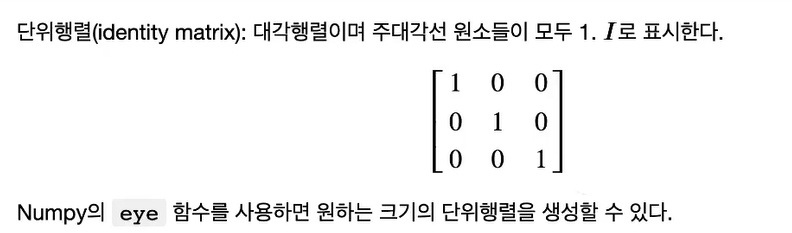

In [92]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

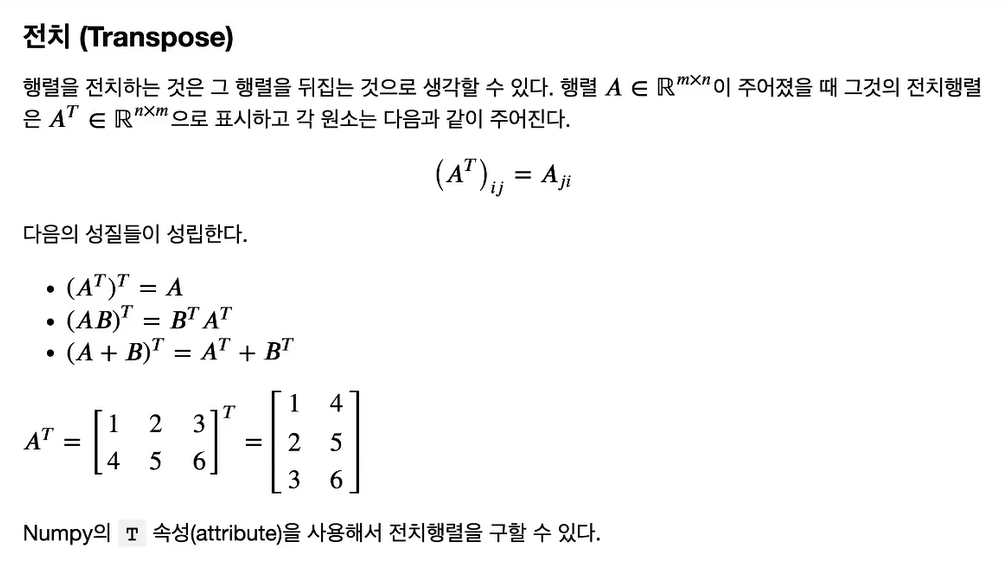

In [93]:
A = np.array([
    [1,2,3],
    [4,5,6]
])

In [94]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [95]:
A.T.T

array([[1, 2, 3],
       [4, 5, 6]])

In [96]:
B = np.array([[1,2], [4,5], [6,7]])
B

array([[1, 2],
       [4, 5],
       [6, 7]])

In [97]:
np.matmul(A, B).T

array([[27, 60],
       [33, 75]])

In [98]:
np.matmul(B.T, A.T)

array([[27, 60],
       [33, 75]])

In [100]:
B = np.array([[1,2,3],[4,5,6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [101]:
(A + B).T

array([[ 2,  8],
       [ 4, 10],
       [ 6, 12]])

In [102]:
A.T + B.T

array([[ 2,  8],
       [ 4, 10],
       [ 6, 12]])

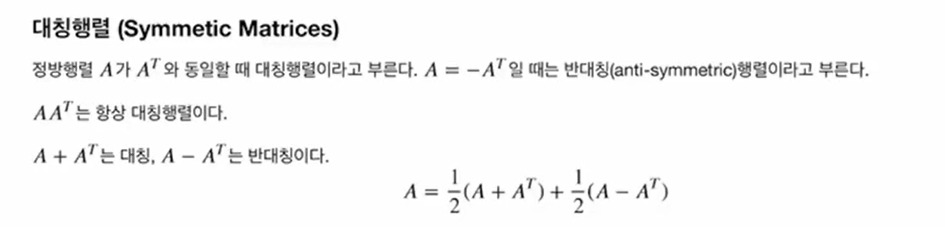

In [103]:
np.matmul(A, A.T)

array([[14, 32],
       [32, 77]])

In [104]:
np.matmul(A.T, A)

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [108]:
A = np.array([
    [1,2],
    [3,4]
])

In [109]:
A + A.T

array([[2, 5],
       [5, 8]])

In [110]:
A - A.T

array([[ 0, -1],
       [ 1,  0]])

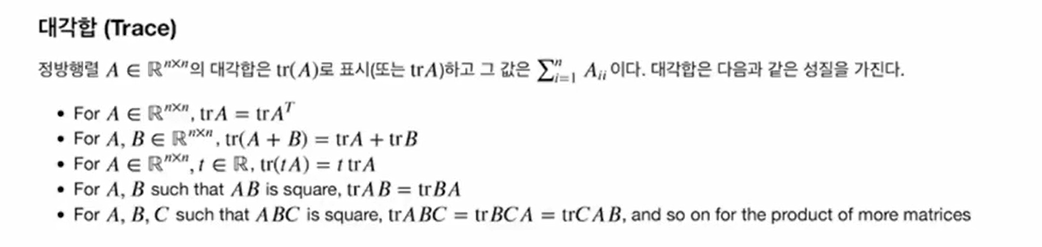

In [107]:
A = np.array([
    [100, 200, 300],
    [10, 20, 30],
    [1, 2, 3],
])
np.trace(A)

# 마지막 특성은 자주 쓰임

123

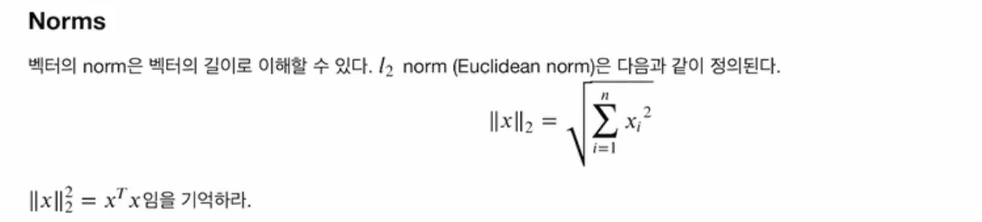

In [112]:
import numpy.linalg as LA

LA.norm(np.array([3, 4]))

5.0

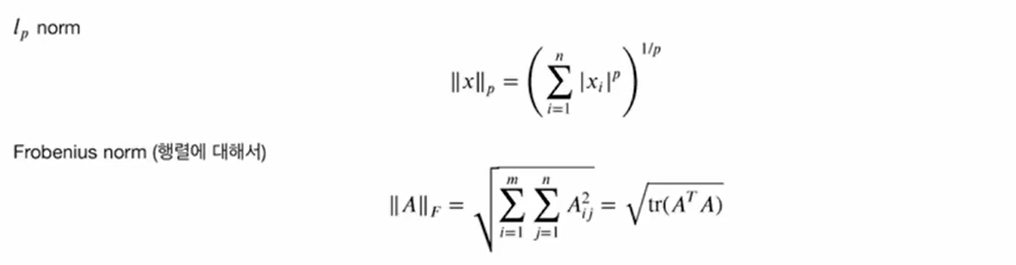

In [113]:
A = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])

# 행렬 norm은 Frobenius norm 이라고 부른다. 

In [114]:
LA.norm(A)

376.0505285197722

In [115]:
np.trace(A.T.dot(A))**0.5

376.0505285197722

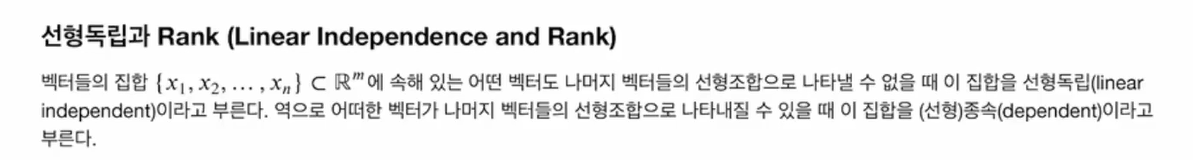

In [46]:
A = np.array([
        [1, 4, 2],
        [2, 1, -3],
        [3, 5, -1],
    ])

위 행렬  *A*의 열들의 집합은 종속이다. 왜냐하면

In [47]:
A[:, 2] == -2*A[:, 0] + A[:,1]

array([ True,  True,  True])

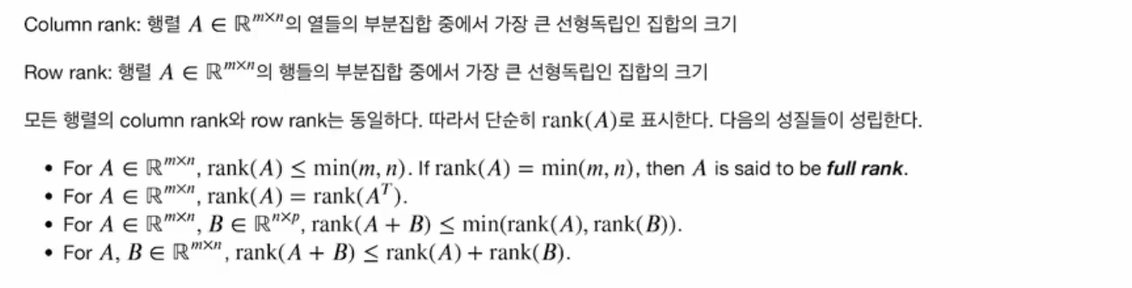

In [48]:
LA.matrix_rank(A)

2

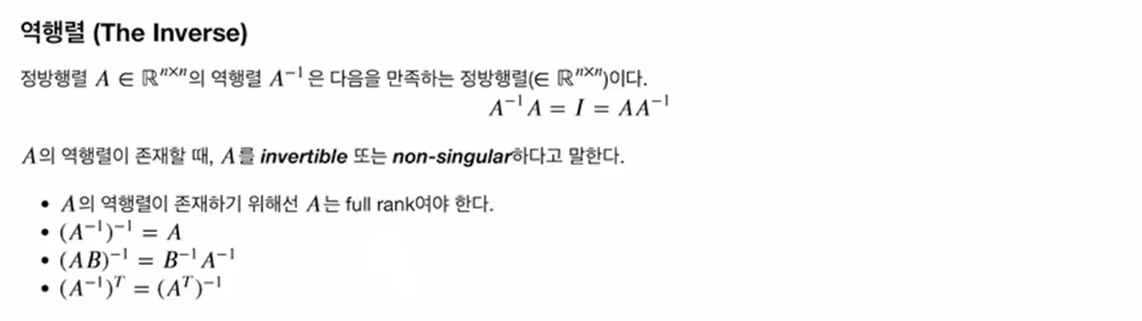

In [49]:
A = np.array([
        [1, 2],
        [3, 4],
    ])
LA.inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [50]:
LA.inv(LA.inv(A))

array([[1., 2.],
       [3., 4.]])

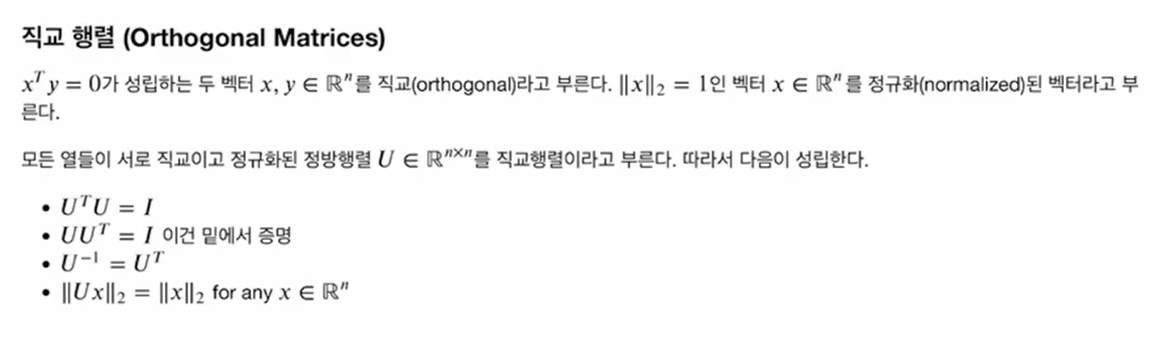

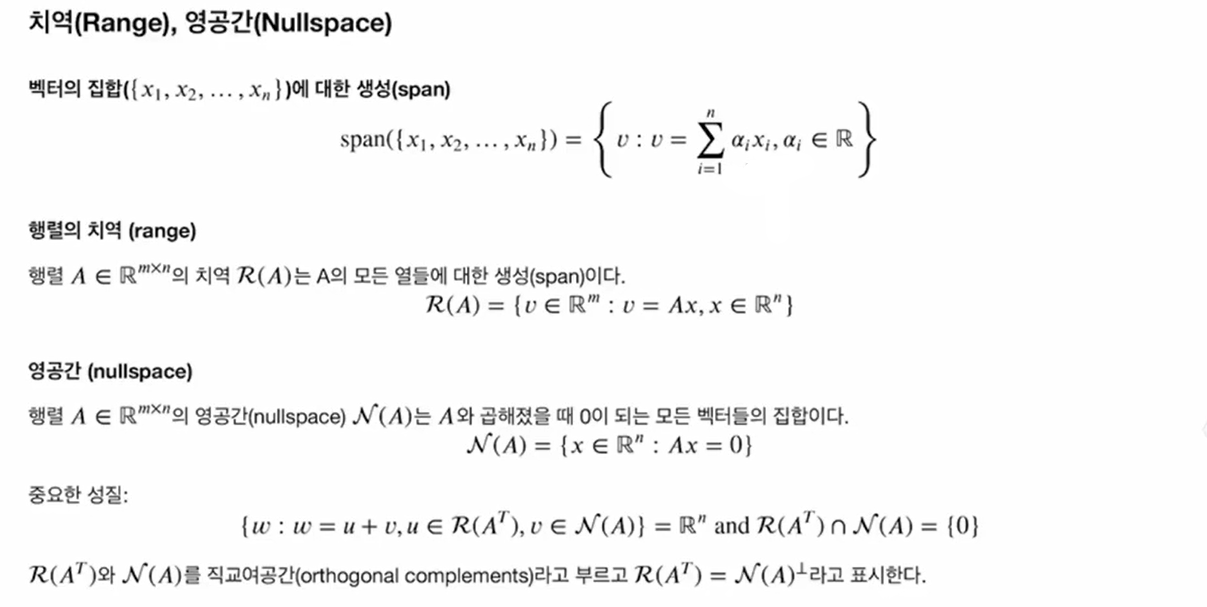

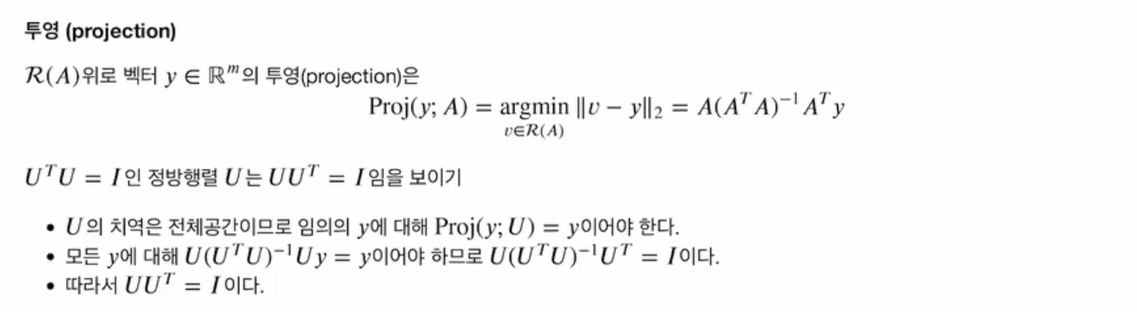

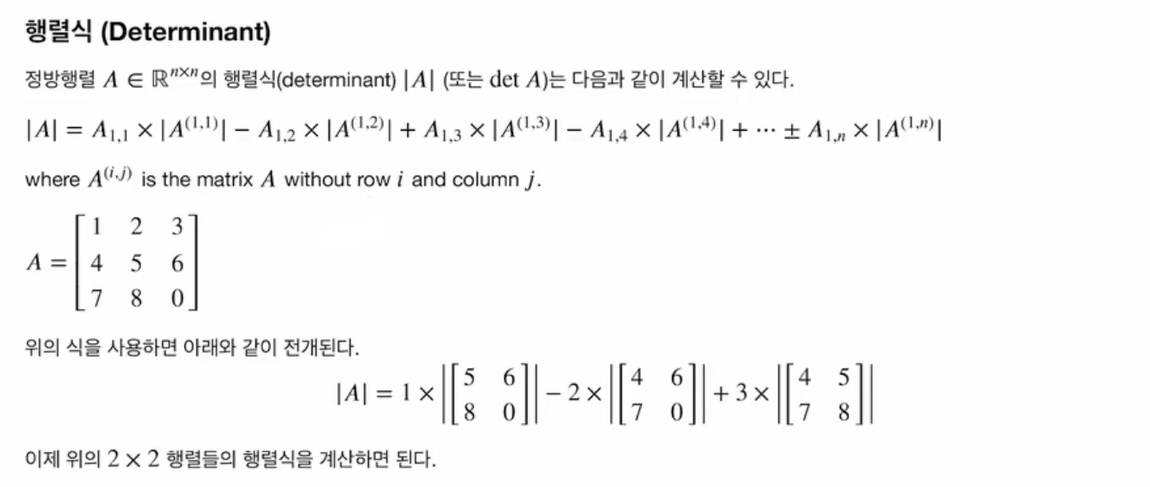

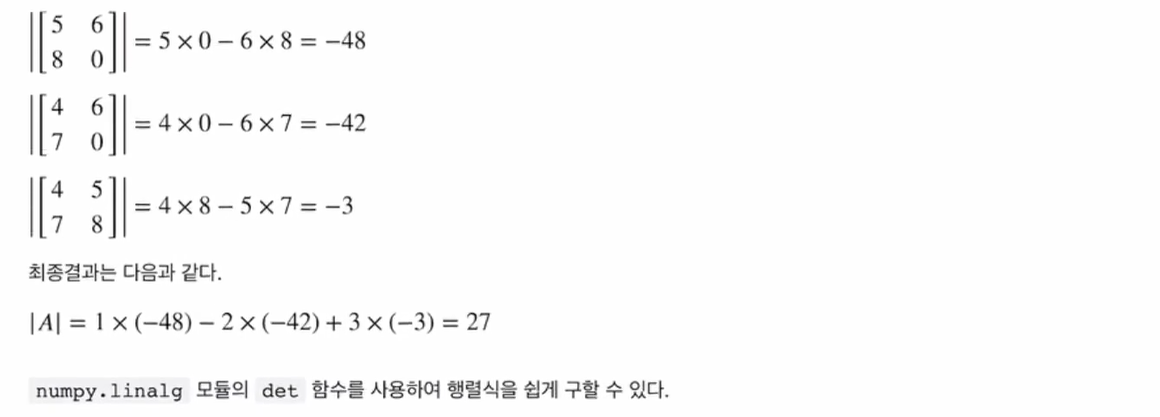

In [51]:
A = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(A)
# 행벡터가 표현할 수 있는 공간 부피

27.0

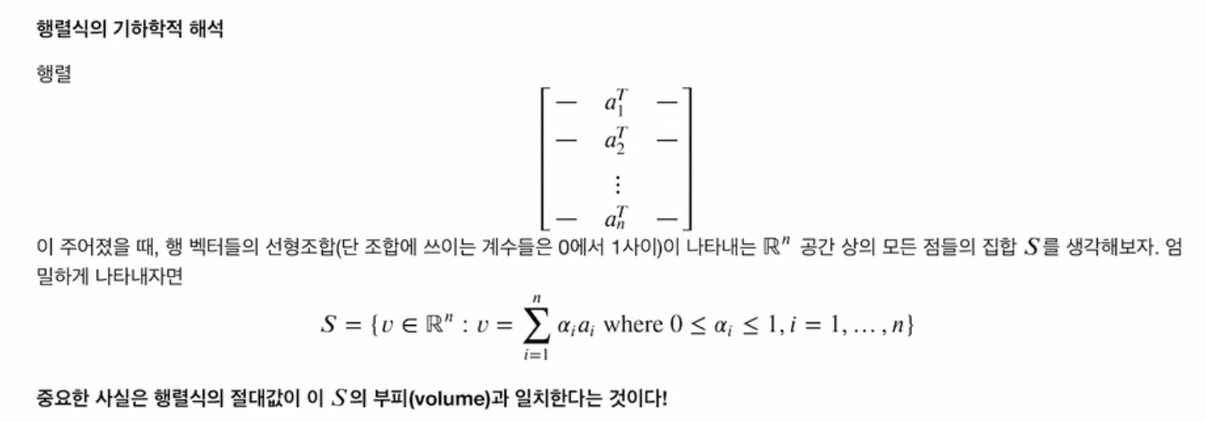

행렬식 = `행벡터가 표현할 수 있는 공간 부피`

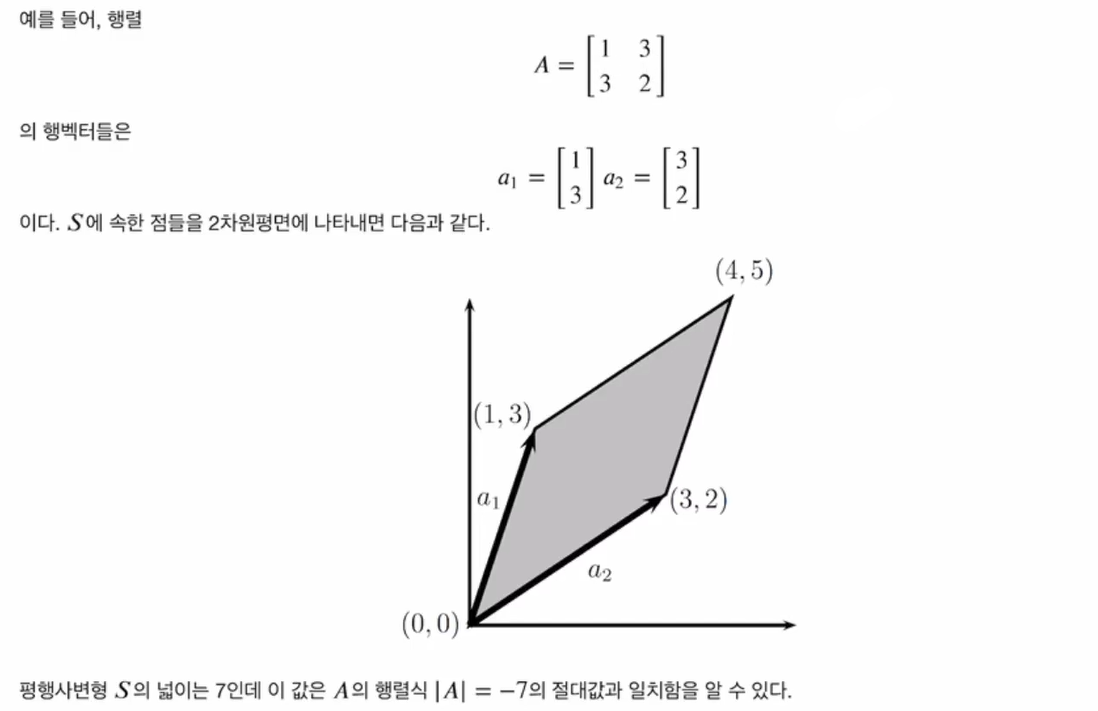

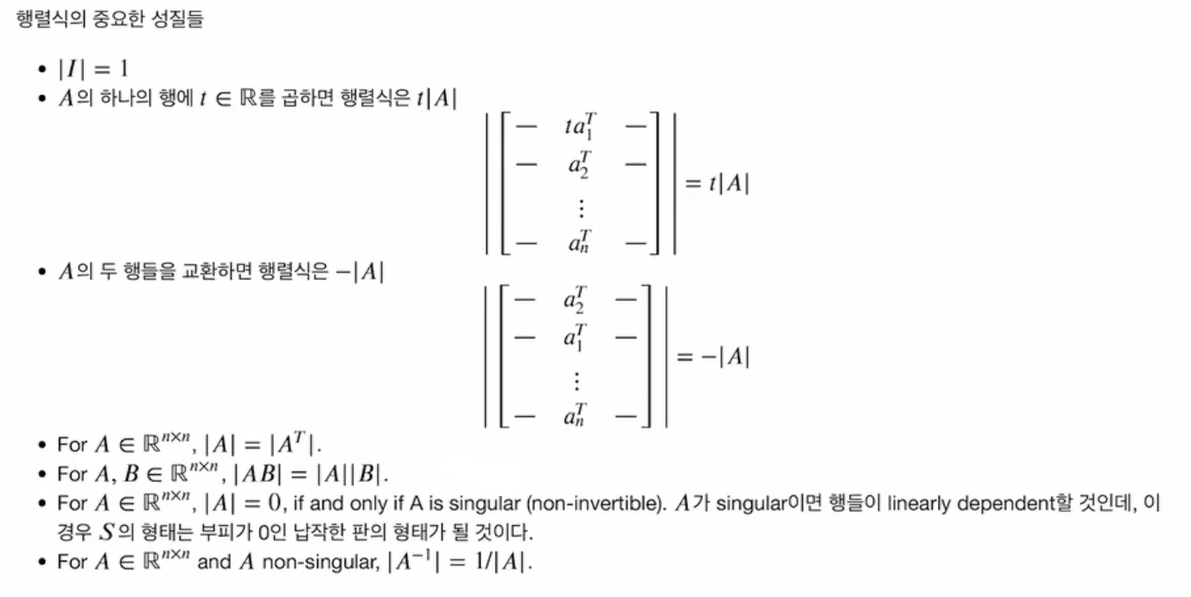

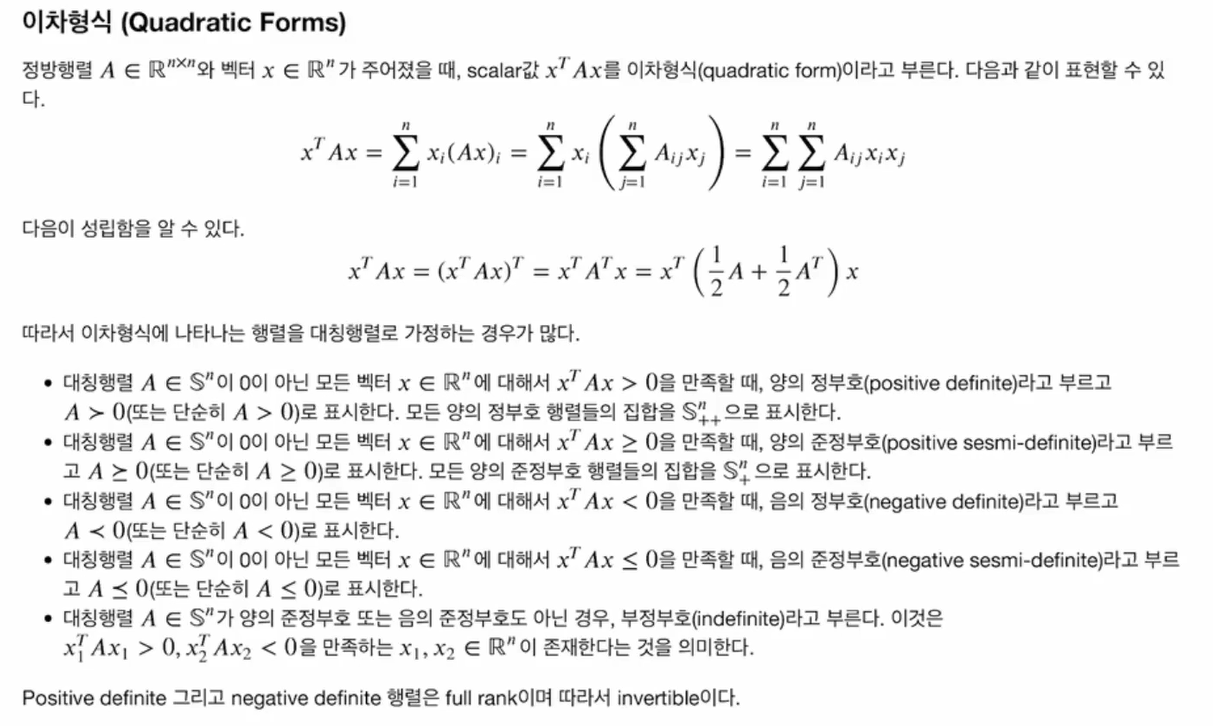

https://deep-learning-study.tistory.com/458

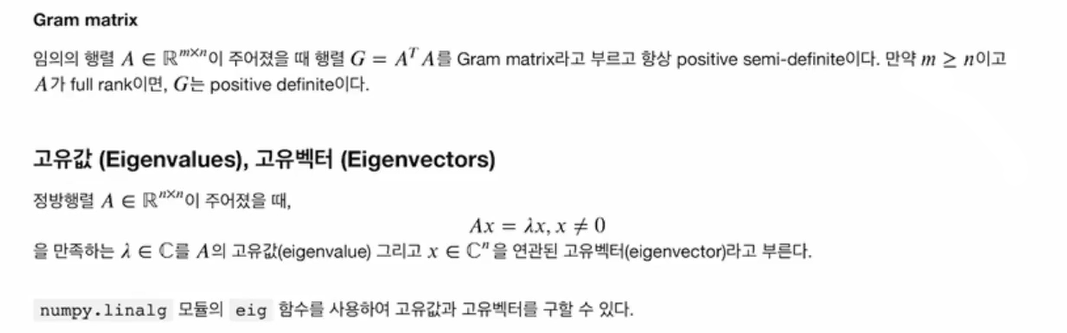

In [118]:
A = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])

In [119]:
eigenvalues, eigenvectors = LA.eig(A)
eigenvalues, eigenvectors

(array([12.12289378, -0.38838384, -5.73450994]),
 array([[-0.29982463, -0.74706733, -0.27625411],
        [-0.70747178,  0.65820192, -0.38842554],
        [-0.63999131, -0.09306254,  0.87909571]]))

In [120]:
eigenvectors[:, 0]

array([-0.29982463, -0.70747178, -0.63999131])

In [55]:
np.matmul(A, eigenvectors[:, 0])

array([-3.63474211, -8.57660525, -7.75854663])

In [56]:
eigenvalues[0] * eigenvectors[:, 0]

array([-3.63474211, -8.57660525, -7.75854663])

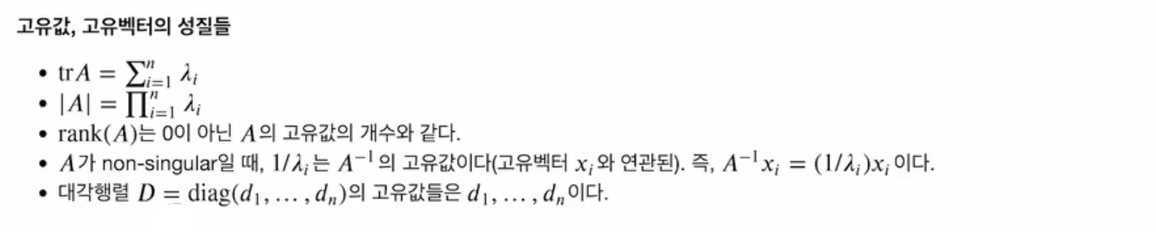

In [121]:
A = np.array([
    [1,2,3],
    [4,5,9],
    [7,8,15]
])

In [122]:
eigenvalues, eigenvectors = LA.eig(A)
eigenvalues, eigenvectors

(array([ 2.12819293e+01, -2.81929326e-01,  8.34205514e-16]),
 array([[ 0.17485683,  0.85386809, -0.57735027],
        [ 0.50887555,  0.18337571, -0.57735027],
        [ 0.84289427, -0.48711666,  0.57735027]]))

In [123]:
LA.matrix_rank(A)

2

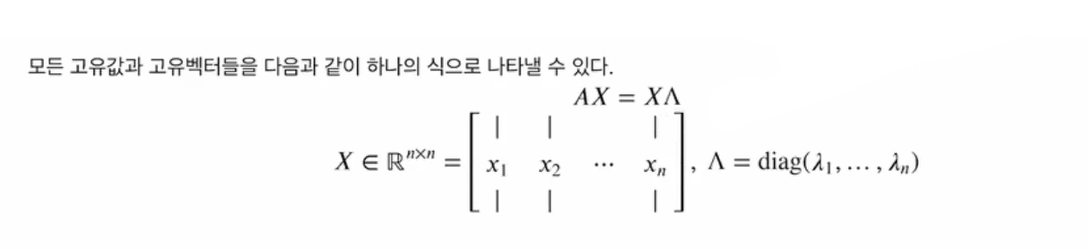

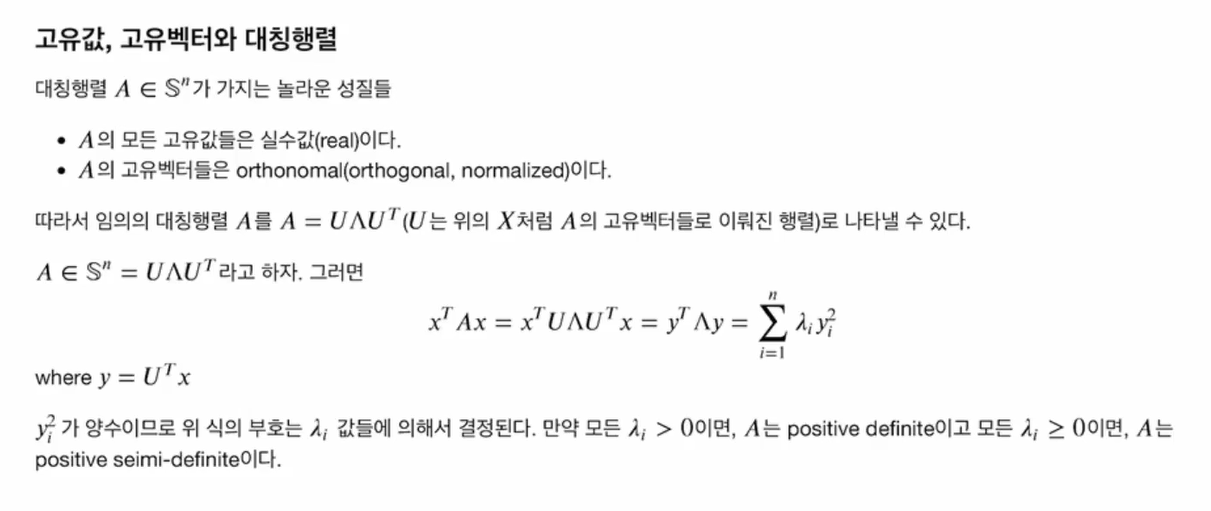

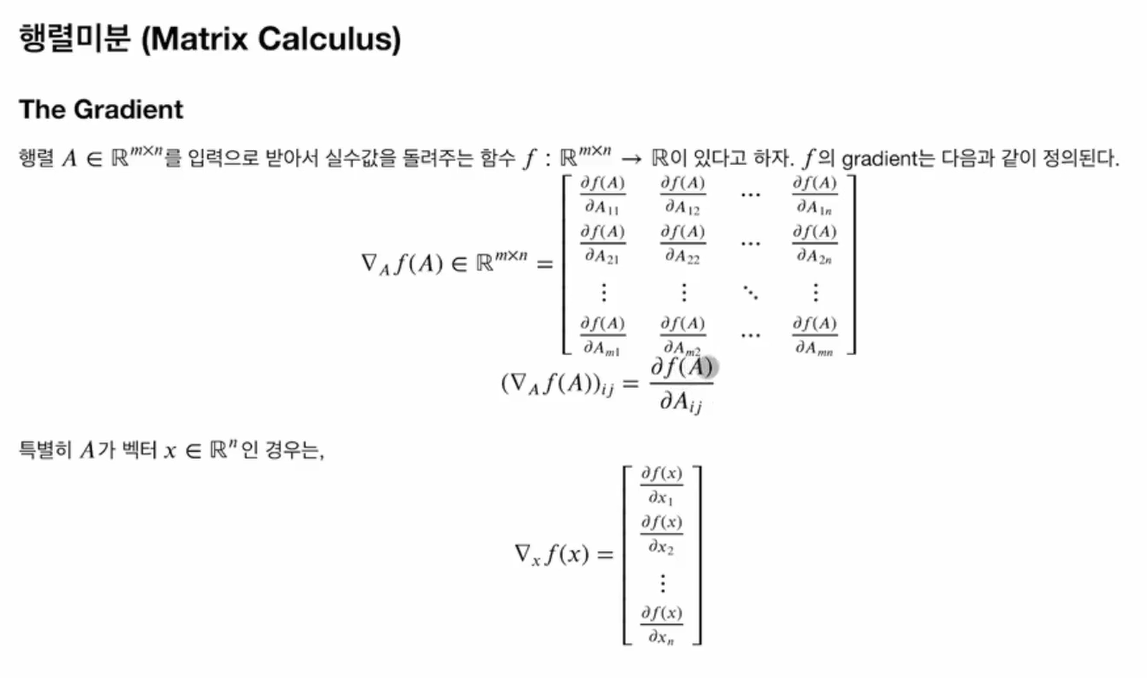

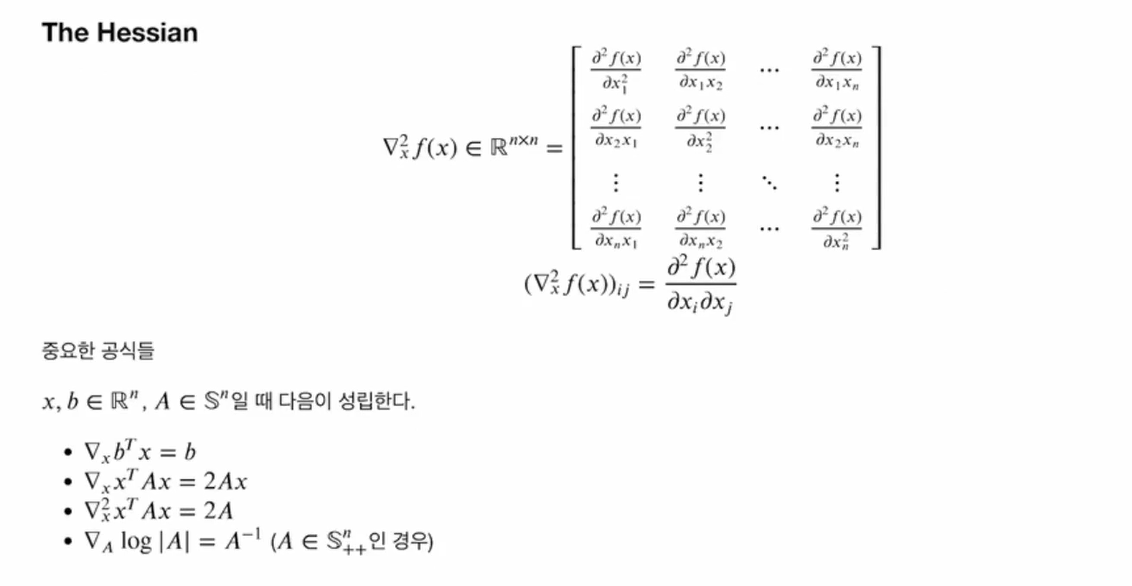

- 위 공식은 자주 쓰임

---- 
# `DL에 선형대수 적용하기`
`최소제곱법 문제`
- Ax=b를 만족하는 b가 치역에 존재하지 않을 때 b에 가장 가까운 값 찾는 문제

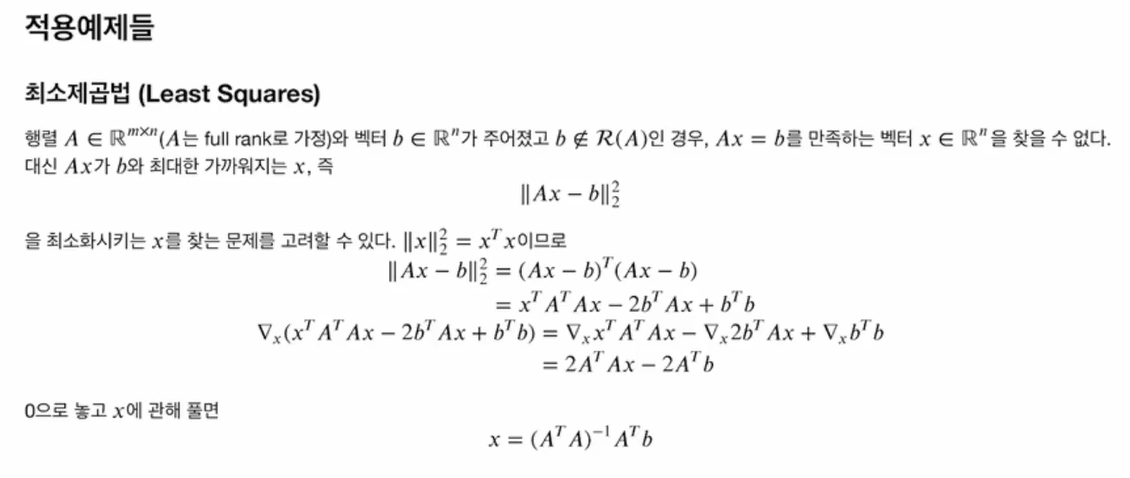

- 거리가 최소인 경우를 찾는 문제이므로, 공식을 사용하여 구한 그레디언트 값이 0일 때 x값이 최소값

`고유값과 최적화문제`

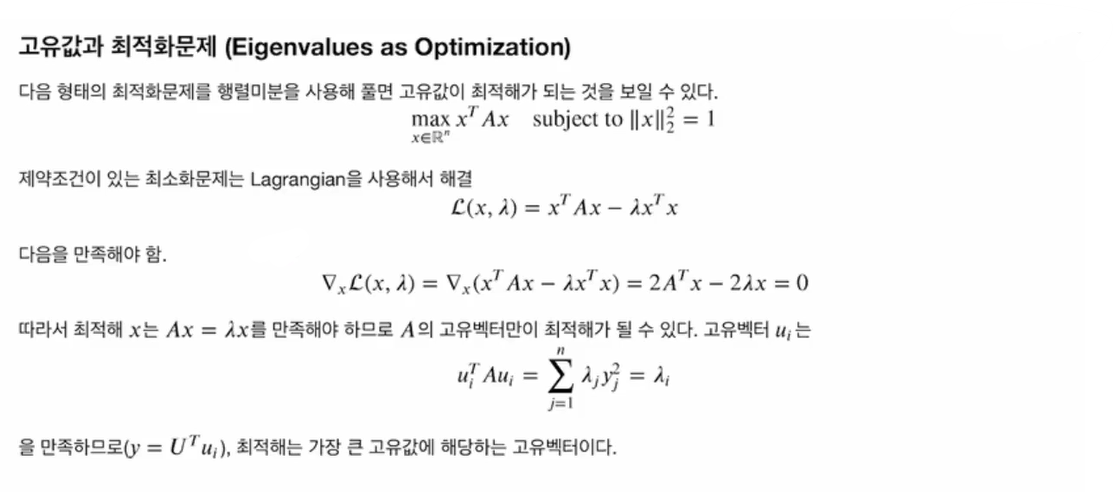

`디코더 형태가 주어졌을 때 최적의 인코더 찾기`

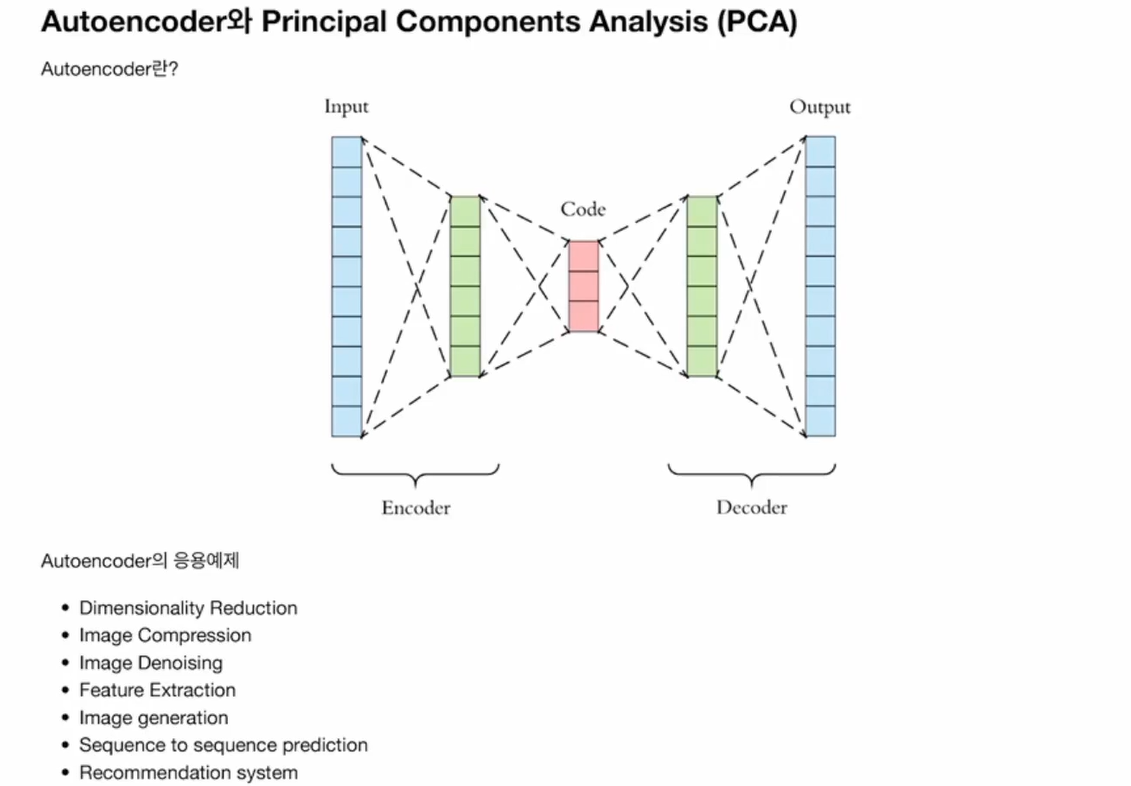

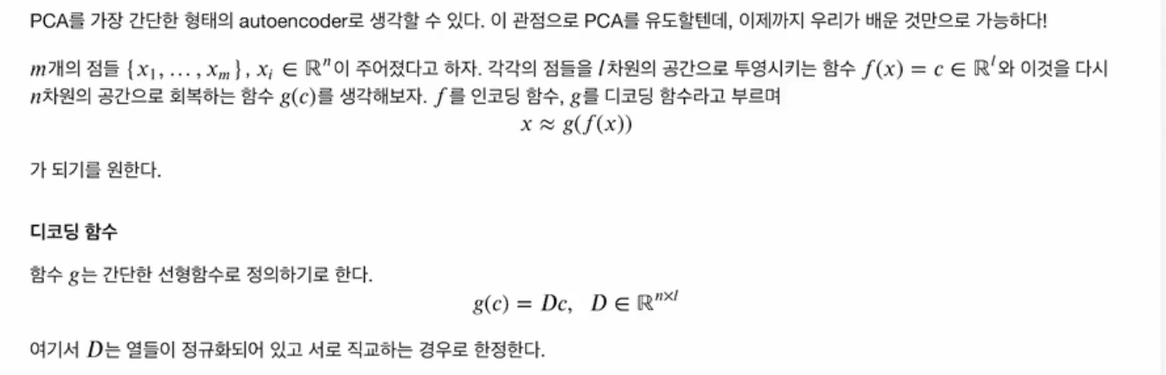

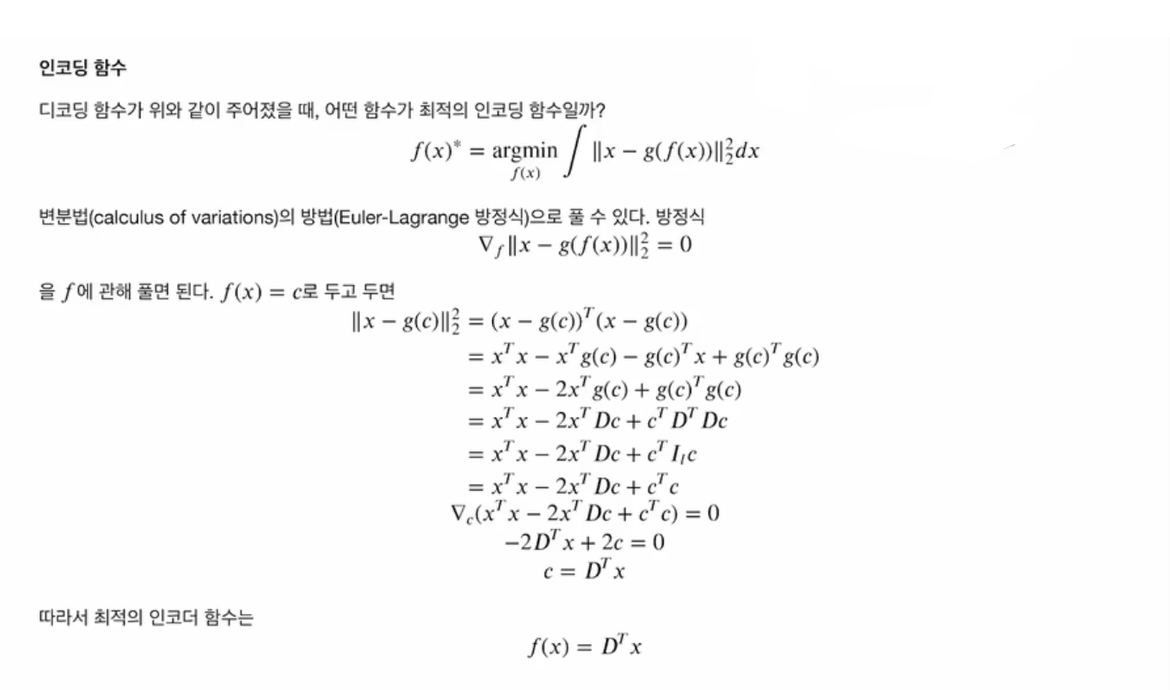

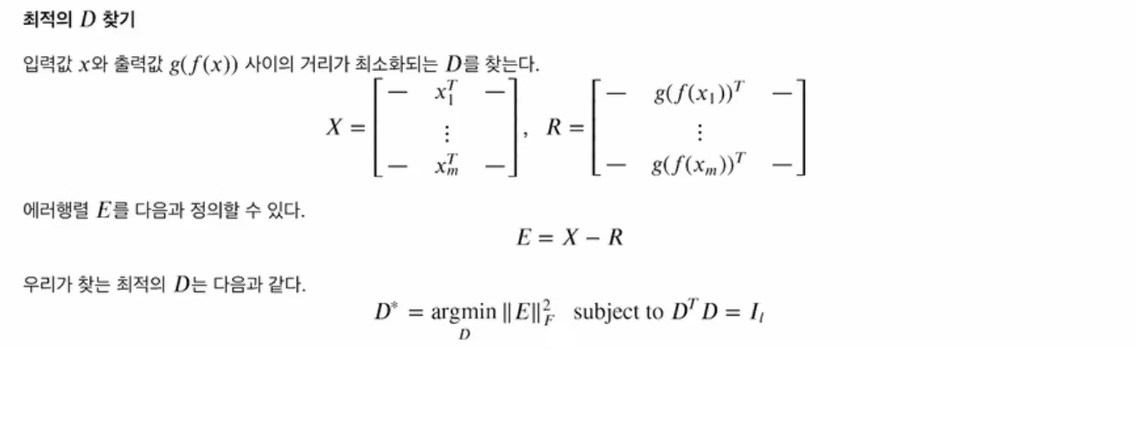

- 결과값과 입력값이 같으면 E=0

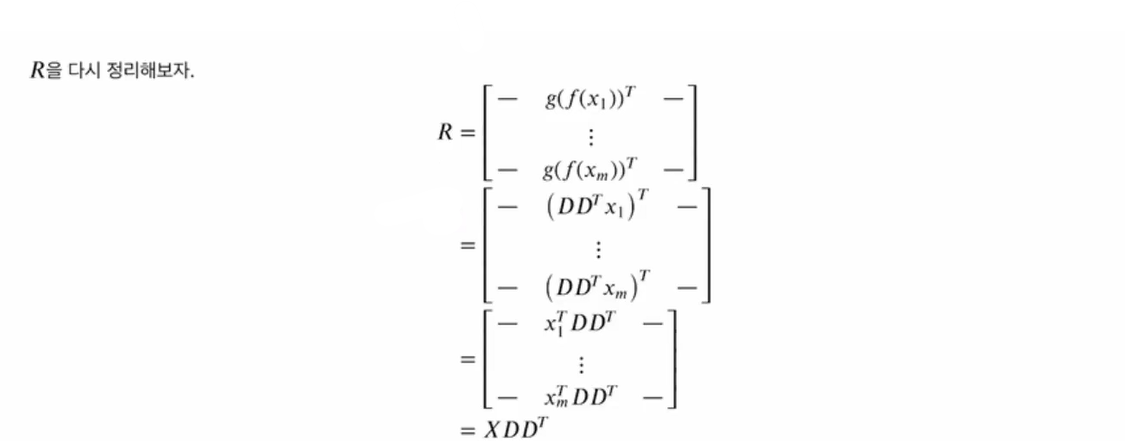

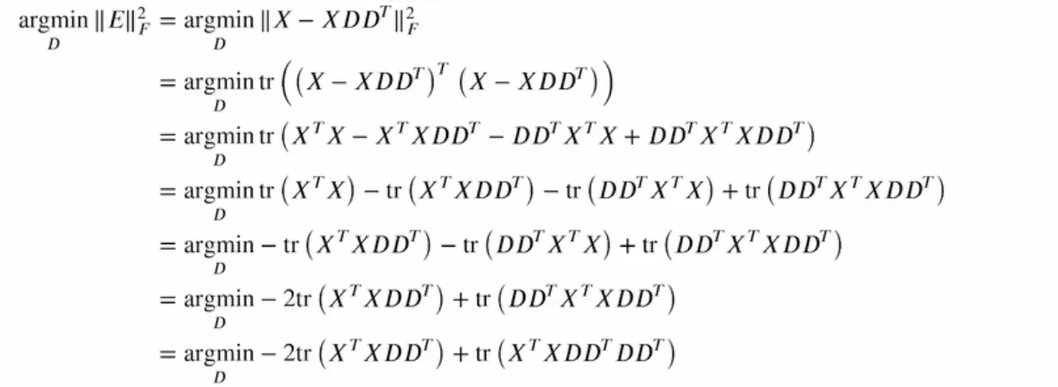

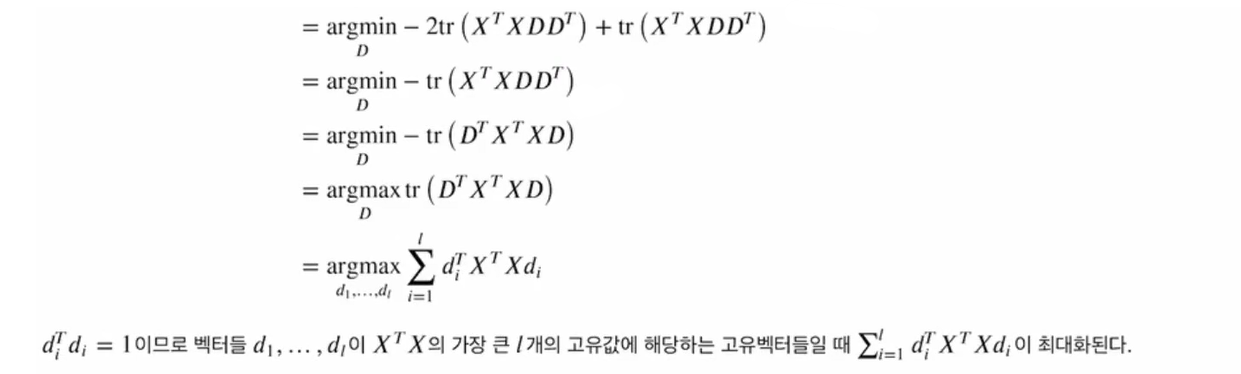